# Práctica 1 Pregunta 1: Análisis exploratorio de los datos

Importa los datos del fichero dataset.csv y realiza el análisis exploratorio de los datos. Describe en el informe los resultados de este análisis y deposita el código Python en Aula Virtual en el fichero 'answer1.ipynb'.

## Importación de bibliotecas para análisis de datos y escalado

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Exploración inicial del dataset con Pandas

In [12]:
dataset = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', len(dataset.columns))

dataset.columns

dataset.shape

dataset.head(1)

dataset.info()

dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    1599 non-null   float64
 1   Col2    1599 non-null   float64
 2   Col3    1599 non-null   float64
 3   Col4    1599 non-null   float64
 4   Col5    1599 non-null   float64
 5   Col6    1599 non-null   float64
 6   Col7    1599 non-null   float64
 7   Col8    1599 non-null   float64
 8   Col9    1599 non-null   float64
 9   Col10   1599 non-null   float64
 10  Col11   1599 non-null   float64
 11  Target  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.996747,3.311113,46.467792,0.658149,0.087467,10.422983,15.874922,8.319637,2.538806,0.270976,5.636023
std,0.179060,0.001887,0.154386,32.895324,0.169507,0.047065,1.065668,10.460157,1.741096,1.409928,0.194801,0.807569
min,0.120000,0.990070,2.740000,6.000000,0.330000,0.012000,8.400000,1.000000,4.600000,0.900000,0.000000,3.000000
25%,0.390000,0.995600,3.210000,22.000000,0.550000,0.070000,9.500000,7.000000,7.100000,1.900000,0.090000,5.000000
50%,0.520000,0.996750,3.310000,38.000000,0.620000,0.079000,10.200000,14.000000,7.900000,2.200000,0.260000,6.000000
75%,0.640000,0.997835,3.400000,62.000000,0.730000,0.090000,11.100000,21.000000,9.200000,2.600000,0.420000,6.000000
max,1.580000,1.003690,4.010000,289.000000,2.000000,0.611000,14.900000,72.000000,15.900000,15.500000,1.000000,8.000000


## Anonimización y análisis de la correlación del dataset

In [13]:
dataset_anonymized = dataset.drop(["Target"], axis=1)
dataset_anonymized.to_csv('dataset_anonymized.csv', index=False)
dataset_anonymized.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11
Col1,1.000000,0.022026,0.234937,0.076470,-0.260987,0.061298,-0.202288,-0.010504,-0.256131,0.001918,-0.552496
Col2,0.022026,1.000000,-0.341699,0.071269,0.148506,0.200632,-0.496180,-0.021946,0.668047,0.355283,0.364947
Col3,0.234937,-0.341699,1.000000,-0.066495,-0.196648,-0.265026,0.205633,0.070377,-0.682978,-0.085652,-0.541904
Col4,0.076470,0.071269,-0.066495,1.000000,0.042947,0.047400,-0.205654,0.667666,-0.113181,0.203028,0.035533
Col5,-0.260987,0.148506,-0.196648,0.042947,1.000000,0.371260,0.093595,0.051658,0.183006,0.005527,0.312770
Col6,0.061298,0.200632,-0.265026,0.047400,0.371260,1.000000,-0.221141,0.005562,0.093705,0.055610,0.203823
Col7,-0.202288,-0.496180,0.205633,-0.205654,0.093595,-0.221141,1.000000,-0.069408,-0.061668,0.042075,0.109903
Col8,-0.010504,-0.021946,0.070377,0.667666,0.051658,0.005562,-0.069408,1.000000,-0.153794,0.187049,-0.060978
Col9,-0.256131,0.668047,-0.682978,-0.113181,0.183006,0.093705,-0.061668,-0.153794,1.000000,0.114777,0.671703
Col10,0.001918,0.355283,-0.085652,0.203028,0.005527,0.055610,0.042075,0.187049,0.114777,1.000000,0.143577


## Separación de características y etiquetas del dataset

In [14]:
X = dataset_anonymized
y = dataset.get("Target")
print('Class labels:', np.unique(y))

Class labels: [3 4 5 6 7 8]


## Visualización de la matriz de correlación en un mapa de calor

<AxesSubplot:>

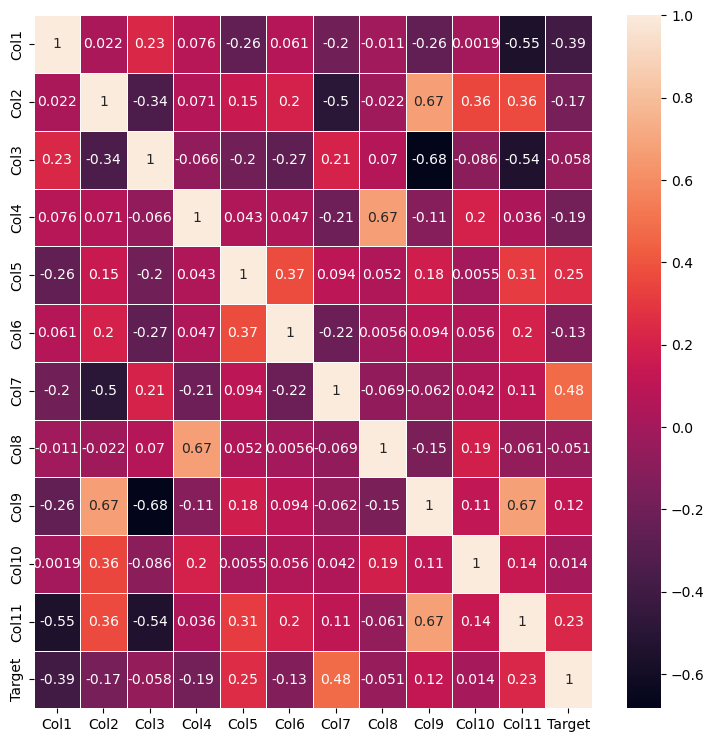

In [15]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(dataset.corr(), linewidth = 0.5, annot=True)

## Visualización de las distribuciones en histogramas

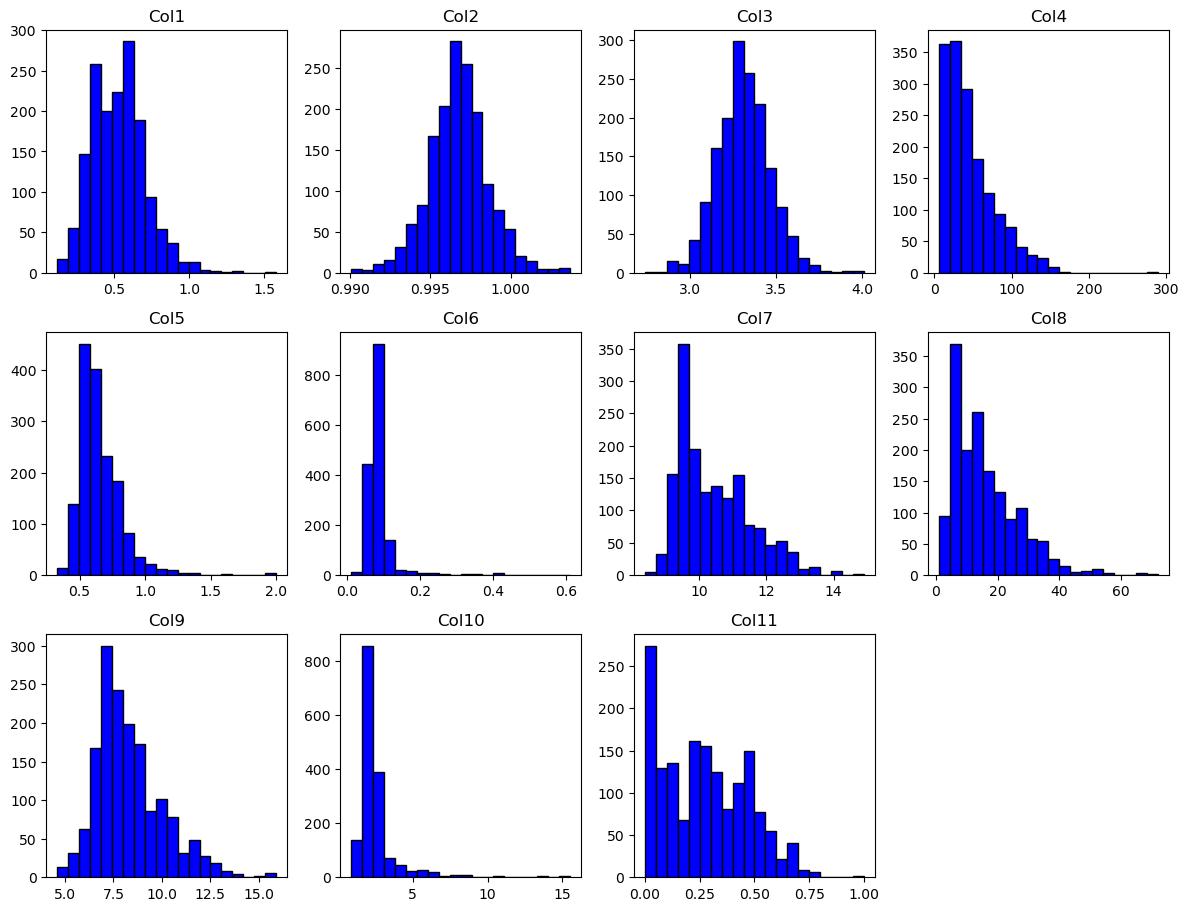

In [16]:
columns = dataset_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,11):
  ax = plt.subplot(4,4,i+1)
  ax.hist(dataset_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

## División del dataset en entrenamiento (75%) y prueba (25%)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.25, random_state=1, stratify=y)

## Estandarización del balance de clases

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [19]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [  0   0   0  10  53 681 638 199  18]
Labels counts in y_train: [  0   0   0   8  40 511 478 149  13]
Labels counts in y_test: [  0   0   0   2  13 170 160  50   5]


## Conversión de Jupyter Notebook en un archivo Python

In [20]:
! python .convert_notebook_to_script.py --input answer1.ipynb --output answer1.py

[NbConvertApp] Converting notebook answer1.ipynb to script
[NbConvertApp] Writing 2528 bytes to answer1.py
